In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
#loading csv
df = pd.read_csv("C:/Users/Hp/Documents/archive.zip")
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
#cleaning process
df.drop_duplicates(inplace=True)
length=len(df)
empty_boxes=df.isna().sum()
sum_of_empty=0
for col, val in empty_boxes.items():
    if val>0:
        p=(val*100)/length
        sum_of_empty+=val
        print(f"Around {round(p, 2)}% of the dataset is missing '{col}' information.")
        df[col]=df[col].fillna('Unknown')
percent=(sum_of_empty*100)/length
print(f'Whole dataset is missing around {round(percent, 2)}% information.')

Around 29.91% of the dataset is missing 'director' information.
Around 9.37% of the dataset is missing 'cast' information.
Around 9.44% of the dataset is missing 'country' information.
Around 0.11% of the dataset is missing 'date_added' information.
Around 0.05% of the dataset is missing 'rating' information.
Around 0.03% of the dataset is missing 'duration' information.
Whole dataset is missing around 48.9% information.


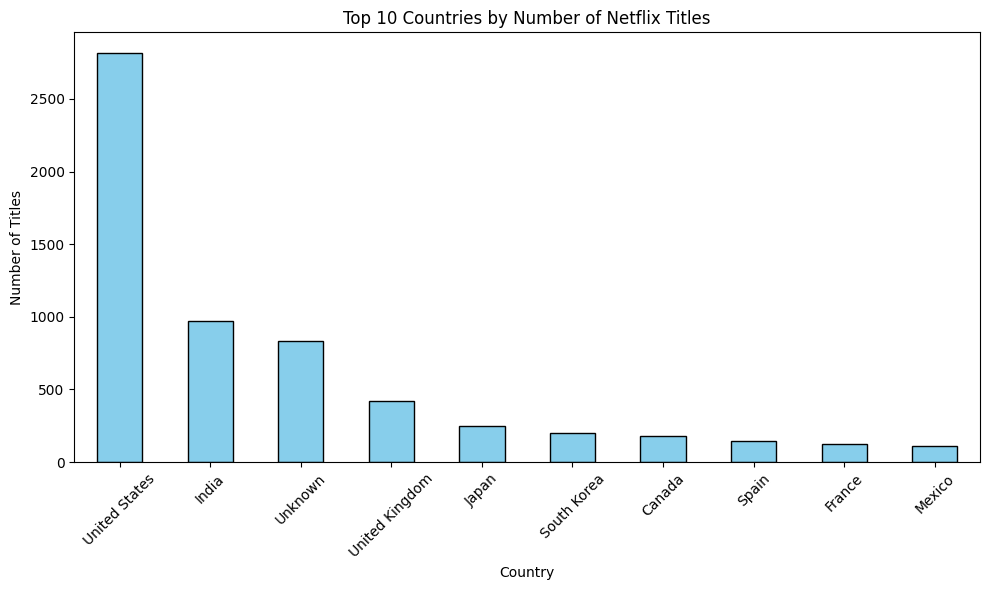

In [5]:
#barchart for top 10 countries
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
#number of movies vs tv shows
type=df['type'].value_counts()
for t, c in type.items():
    print(f'{t}: {c}')

Movie: 6131
TV Show: 2676


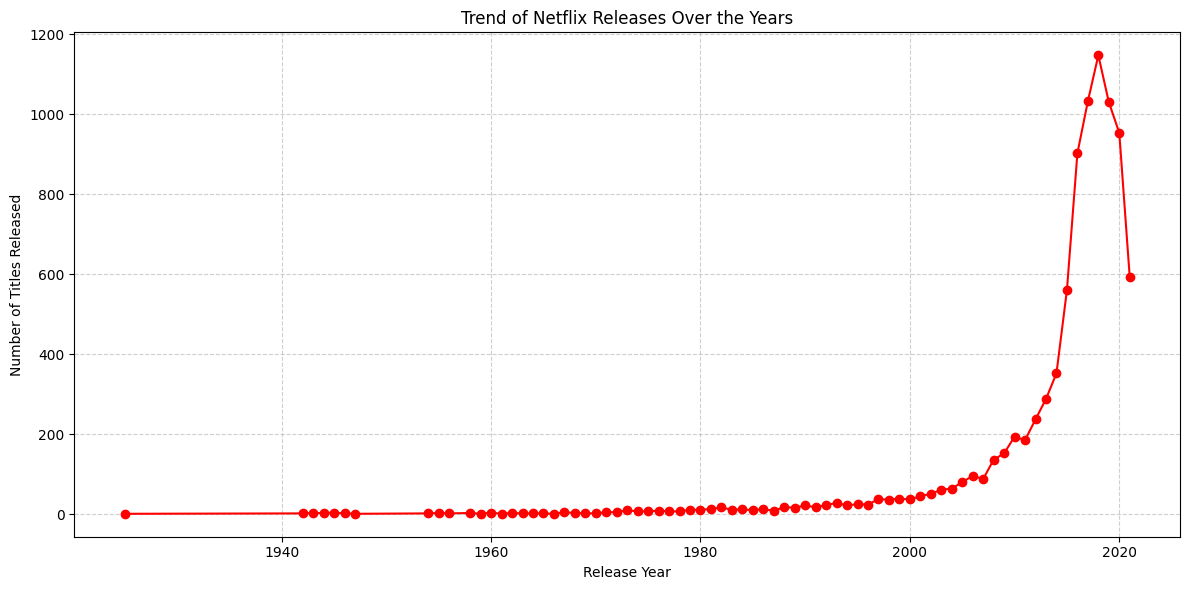

In [7]:
#trend of releases over the years
year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
year_counts.plot(kind='line', marker='o', color='red')
plt.title("Trend of Netflix Releases Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

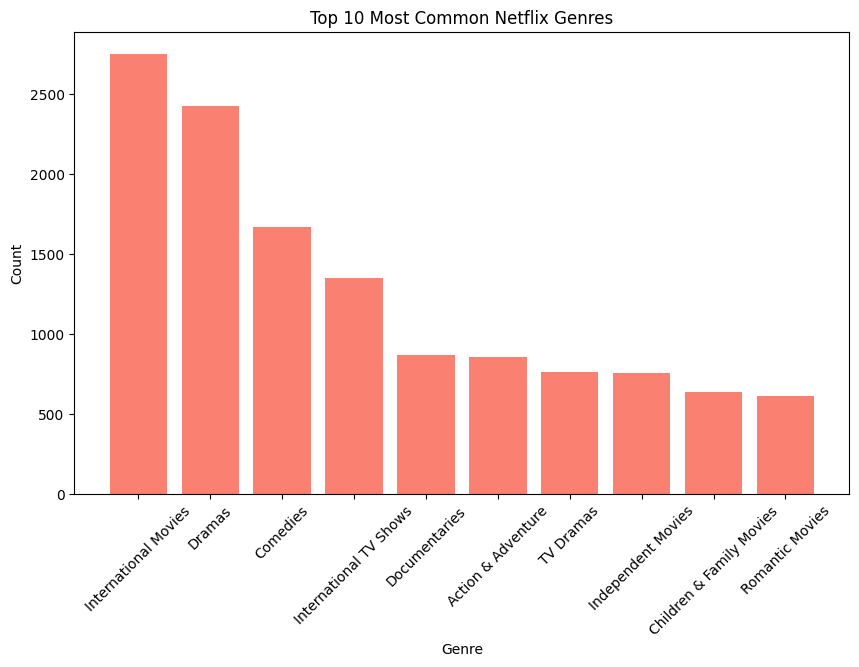

In [8]:
#common genres
all_genres = df['listed_in'].dropna().str.split(',').sum()
all_genres = [genre.strip() for genre in all_genres] 
genre_counts = Counter(all_genres).most_common(10)
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='salmon')
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()